In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

from mlscorecheck.auc import auc_from_sens_spec, acc_from_auc

In [327]:
data = pd.read_csv('single.csv')

In [328]:
data.head()

,Unnamed: 0,dataset,acc,sens,spec,auc,best_acc,best_sens,best_spec,threshold,best_threshold,p,n
0,0,abalone9_18,0.9728,0.2000,1.0000,0.647183,0.9728,0.2000,1.0000,0.363737,0.714286,5,142
1,1,appendicitis,0.8636,0.5000,0.9444,0.597222,0.8636,0.5000,0.9444,0.089821,1.000000,4,18
2,2,australian,0.5435,0.0156,1.0000,0.746199,0.7174,0.7812,0.6622,0.518418,0.351968,64,74
3,3,bupa,0.5942,0.2414,0.8500,0.511207,0.5942,0.2414,0.8500,0.080741,1.000000,29,40
4,4,CM1,0.8900,0.0000,0.9889,0.725556,0.8900,0.0000,0.9889,0.441309,0.570937,10,90


In [329]:
data['auc_min_max_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['acc'], 'sens': row['sens'], 'spec': row['spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='min',
        upper='max'
        ), 
axis=1)

data['auc_cmin_max_int'] = data.apply(
    lambda row:
    auc_from_sens_spec(
        scores={'acc': row['acc'], 'sens': row['sens'], 'spec': row['spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='cmin',
        upper='max'
        ),
axis=1)

data['auc_max_acc_min_max_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['best_acc'], 'sens': row['best_sens'], 'spec': row['best_spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='min',
        upper='max'
        ), 
axis=1)

data['auc_max_acc_cmin_max_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['best_acc'], 'sens': row['best_sens'], 'spec': row['best_spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='cmin',
        upper='max'
        ), 
axis=1)

data['auc_max_acc_min_amax_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['best_acc'], 'sens': row['best_sens'], 'spec': row['best_spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='min',
        upper='amax'
        ), 
axis=1)

data['auc_max_acc_cmin_amax_int'] = data.apply(
    lambda row: 
    auc_from_sens_spec(
        scores={'acc': row['best_acc'], 'sens': row['best_sens'], 'spec': row['best_spec']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        lower='cmin',
        upper='amax'
        ), 
axis=1)

In [330]:
data['acc_min_max_int'] = data.apply(
    lambda row: 
    acc_from_auc(
        scores={'auc': row['auc']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        upper='max'
        ), 
axis=1)

data['acc_min_cmax_int'] = data.apply(
    lambda row: 
    acc_from_auc(
        scores={'auc': row['auc']},
        p=row['p'],
        n=row['n'],
        eps=1e-4,
        upper='cmax'
        ), 
axis=1)

In [331]:
for label in ['auc_min_max_int', 'auc_cmin_max_int', 
              'auc_max_acc_min_max_int', 'auc_max_acc_cmin_max_int', 
              'auc_max_acc_min_amax_int', 'auc_max_acc_cmin_amax_int', 
              'acc_min_max_int', 'acc_min_cmax_int']:
    data[label[:-4]] = data[label].apply(lambda x: None if x is None else (x[0] + x[1])/2.0)

In [332]:
data['auc_min_max_diff'] = data['auc'] - data['auc_min_max']
data['auc_cmin_max_diff'] = data['auc'] - data['auc_cmin_max']
data['auc_max_acc_min_max_diff'] = data['auc'] - data['auc_max_acc_min_max']
data['auc_max_acc_cmin_max_diff'] = data['auc'] - data['auc_max_acc_cmin_max']
data['auc_max_acc_min_amax_diff'] = data['auc'] - data['auc_max_acc_min_amax']
data['auc_max_acc_cmin_amax_diff'] = data['auc'] - data['auc_max_acc_cmin_amax']

data['acc_min_max_diff'] = data['acc'] - data['acc_min_max']
data['acc_min_cmax_diff'] = data['best_acc'] - data['acc_min_cmax']

In [333]:
figsize = (3.5, 2)
figsize2 = (2, 2)
n_bins = 20

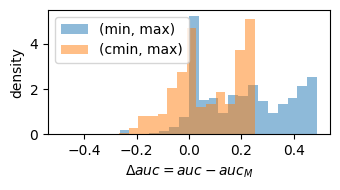

In [334]:
plt.figure(figsize=figsize)
plt.hist(data['auc_min_max_diff'], label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['auc_cmin_max_diff'], label='(cmin, max)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\Delta auc = auc - auc_M$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('auc-min-max-cmin-max-hist.pdf')
plt.show()

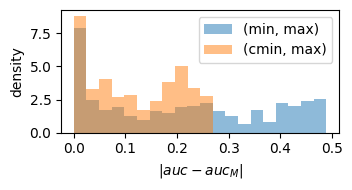

In [335]:
plt.figure(figsize=figsize)
plt.hist(np.abs(data['auc_min_max_diff']), label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['auc_cmin_max_diff']), label='(cmin, max)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\vert auc - auc_M\vert$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('auc-min-max-cmin-max-abs-hist.pdf')
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_1008692/1795644591.py:7: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta auc_M$ (cmin, max)')


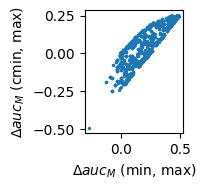

In [336]:
plt.figure(figsize=figsize2)
plt.scatter(data['auc_min_max_diff'], data['auc_cmin_max_diff'], s=2)
#plt.scatter(, data['auc'], s=2)
#plt.scatter(data['auc'], data['auc_min_max'], s=2, label='(min, max)')
#plt.scatter(data['auc'], data['auc_cmin_max'], s=2, label='(cmin, max)')
plt.xlabel(r'$\Delta auc_M$ (min, max)')
plt.ylabel('$\Delta auc_M$ (cmin, max)')
#plt.xlabel('auc')
#plt.ylabel(r'$auc_M$')
#plt.xlim((0.4, 1.0))
#plt.ylim((0.4, 1.0))
plt.tight_layout()
plt.savefig('auc-min-max-cmin-max-scatter.pdf')
plt.show()

In [337]:
data[(data['auc'] > 0.98) & (data['auc_min_max'] < 0.55)]

,Unnamed: 0,dataset,acc,sens,spec,auc,best_acc,best_sens,best_spec,threshold,...,acc_min_max,acc_min_cmax,auc_min_max_diff,auc_cmin_max_diff,auc_max_acc_min_max_diff,auc_max_acc_cmin_max_diff,auc_max_acc_min_amax_diff,auc_max_acc_cmin_amax_diff,acc_min_max_diff,acc_min_cmax_diff
24,24,vowel0,0.8889,0.0435,1.0,1.000000,1.0000,1.0000,1.0000,0.474317,...,0.996796,0.996796,0.478302,0.249531,0.000100,0.000100,0.000100,0.000100,-0.107896,0.003204
35,35,ecoli1,0.7500,0.0556,1.0,0.981111,0.9412,0.8333,0.9800,0.939299,...,0.936719,0.936695,0.453364,0.230344,0.074542,0.067486,0.077311,0.070254,-0.186719,0.004505
52,52,vowel0,0.8889,0.0435,1.0,1.000000,1.0000,1.0000,1.0000,0.128051,...,0.996796,0.996796,0.478302,0.249531,0.000100,0.000100,0.000100,0.000100,-0.107896,0.003204
80,80,vowel0,0.8889,0.0435,1.0,0.982112,0.9747,0.9130,0.9829,0.265230,...,0.955992,0.955983,0.460414,0.231643,0.034251,0.032281,0.035059,0.033089,-0.067092,0.018717
91,91,ecoli1,0.7500,0.0556,1.0,0.986667,0.9412,0.8889,0.9600,0.633162,...,0.947115,0.947103,0.458919,0.235899,0.062302,0.058808,0.064513,0.061020,-0.197115,-0.005903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,2712,vowel0,0.8889,0.0435,1.0,1.000000,1.0000,1.0000,1.0000,0.573748,...,0.996796,0.996796,0.478302,0.249531,0.000100,0.000100,0.000100,0.000100,-0.107896,0.003204
2739,2739,vehicle0,0.7529,0.0233,1.0,0.998535,0.9882,0.9535,1.0000,0.919079,...,0.982631,0.982631,0.486936,0.248402,0.021883,0.021340,0.022064,0.021521,-0.229731,0.005569
2768,2768,vowel0,0.8889,0.0435,1.0,0.982112,0.9747,0.9130,0.9829,0.170389,...,0.955992,0.955983,0.460414,0.231643,0.034251,0.032281,0.035059,0.033089,-0.067092,0.018717
2793,2793,shuttle-c0-vs-c4,0.9344,0.0400,1.0,1.000000,1.0000,1.0000,1.0000,0.338458,...,0.997477,0.997477,0.480052,0.249604,0.000100,0.000100,0.000100,0.000100,-0.063077,0.002523


In [338]:
wilcoxon(
    np.abs(data.dropna()['auc_cmin_max_diff']), 
    np.abs(data.dropna()['auc_min_max_diff']), 
    alternative='less'
)

WilcoxonResult(statistic=np.float64(48909.5), pvalue=np.float64(9.858047701976891e-254))

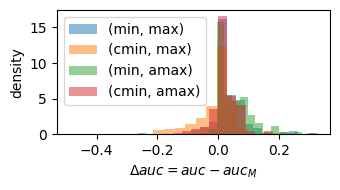

In [339]:
plt.figure(figsize=figsize)
plt.hist(data['auc_max_acc_min_max_diff'], label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['auc_max_acc_cmin_max_diff'], label='(cmin, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['auc_max_acc_min_amax_diff'], label='(min, amax)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['auc_max_acc_cmin_amax_diff'], label='(cmin, amax)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\Delta auc = auc - auc_M$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('auc-min-amax-cmin-amax-hist.pdf')
plt.show()

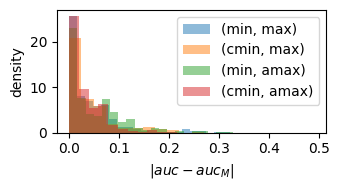

In [340]:
plt.figure(figsize=figsize)
plt.hist(np.abs(data['auc_max_acc_min_max_diff']), label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['auc_max_acc_cmin_max_diff']), label='(cmin, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['auc_max_acc_min_amax_diff']), label='(min, amax)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['auc_max_acc_cmin_amax_diff']), label='(cmin, amax)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\vert auc - auc_M\vert$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('auc-min-amax-cmin-amax-abs-hist.pdf')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_1008692/2676223456.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta auc_M$ (cmin, amax)')


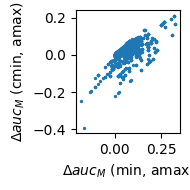

In [341]:
plt.figure(figsize=figsize2)
plt.scatter(data['auc_max_acc_min_amax_diff'], data['auc_max_acc_cmin_amax_diff'], s=2)
plt.xlabel(r'$\Delta auc_M$ (min, amax)')
plt.ylabel('$\Delta auc_M$ (cmin, amax)')
plt.tight_layout()
plt.savefig('auc-min-amax-cmin-amax-scatter.pdf')
plt.show()

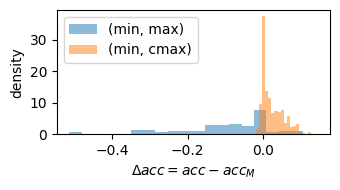

In [342]:
plt.figure(figsize=figsize)
plt.hist(data['acc_min_max_diff'], label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(data['acc_min_cmax_diff'], label='(min, cmax)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\Delta acc = acc - acc_M$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('acc-min-max-min-cmax-hist.pdf')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


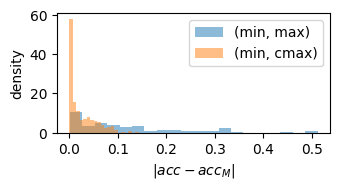

In [343]:
plt.figure(figsize=figsize)
plt.hist(np.abs(data['acc_min_max_diff']), label='(min, max)', alpha=0.5, density=True, bins=n_bins)
plt.hist(np.abs(data['acc_min_cmax_diff']), label='(min, cmax)', alpha=0.5, density=True, bins=n_bins)
plt.xlabel(r'$\vert acc - acc_M \vert$')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.savefig('acc-min-max-min-cmax-abs-hist.eps')
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_1008692/1748479939.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta acc_M$ (min, amax)')


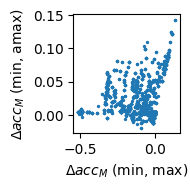

In [344]:
plt.figure(figsize=figsize2)
plt.scatter(data['acc_min_max_diff'], data['acc_min_cmax_diff'], s=2)
plt.xlabel(r'$\Delta acc_M$ (min, max)')
plt.ylabel('$\Delta acc_M$ (min, amax)')
plt.tight_layout()
plt.savefig('acc-min-max-min-cmax-scatter.pdf')
plt.show()